# Lab 3 - Data Cleaning II - Handling Outliers and data transformation

## Objectives

1. Identifying and Handling Outliers (25 min)
  - Outlier Detection Techniques:
    - Univariate methods: Z-score, IQR (Interquartile Range).
    - Multivariate methods (for high-dimensional data), mentioned but not covered in detail: 
      - Mahalanobis Distance
      - DBSCAN
      - Local Outlier Factor (LOF)
      - Isolation Forest
      - Elliptic Envelope (Robust Covariance Estimation).
    - Visual methods: Box plots, scatter plots.
    - Hands-on: Use these techniques to detect outliers in a dataset.
  - Outlier Handling Strategies:
    - Removal, transformation (log, square root), or capping.
    - Discussion on when to keep outliers vs. removing them.
    - Hands-on: Implement different handling strategies on outlier data.
2. Data Transformation (30 mins)
  - Scaling and Normalization:
    - Techniques: Min-Max scaling, Standardization (Z-score), Log transformation.
    - Hands-on: Apply these scaling techniques using tools like pandas/Sklearn.
  - Categorical Data Transformation:
    - Encoding techniques: One-hot encoding, Label encoding.
    - Hands-on: Transform categorical variables into numeric forms.
  - Feature Engineering:
    - Deriving new features based on transformations (e.g., binning).
    - Hands-on: Create new features from a dataset to enhance analysis potential. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Outlier Detection & Handling

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

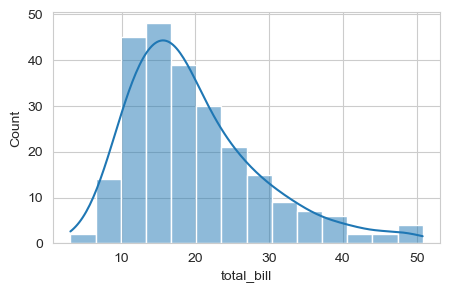

In [32]:
plt.figure(figsize=(5, 3))
sns.set_style('whitegrid')
sns.histplot(tips['total_bill'], kde=True)

### Outlier Detection Methods:
#### Using Z-scores

<!-- zcore equation -->
$$Z = \frac{(X - \mu)}{\sigma}$$


<Axes: xlabel='z_score', ylabel='Count'>

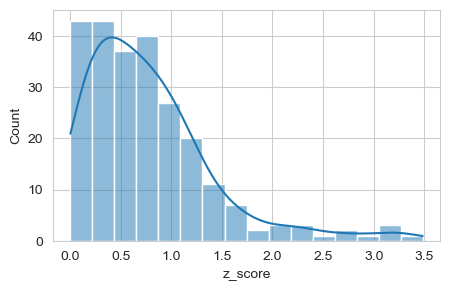

In [34]:
tips['z_score'] = np.abs((tips['total_bill'] - tips['total_bill'].mean()) / tips['total_bill'].std())

plt.figure(figsize=(5, 3))
sns.histplot(tips['z_score'], kde=True)

Statistical techniques like Z-score utilize statistical properties to identify outliers. The Z-score measures how many standard deviations an observation is from the mean. Any observations with a Z-score above 3 or below -3 are typically considered outliers.

In [83]:
z_outliers_mask = tips['z_score'] > 3
tips.drop(columns='z_score', inplace=True)
z_outliers = tips[z_outliers_mask] 
print(f'Percentage of Outliers: {len(z_outliers)/len(tips)*100:.3f}%')
z_outliers

Percentage of Outliers: 1.639%


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


#### IQR Method (for `total_bill` column):**

$$ IQR = Q3 - Q1 $$

$$ \text{Outliers} < Q1 - 1.5 * IQR \text{  or  } \text{Outliers} > Q3 + 1.5 * IQR $$


In [27]:
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

Q1: 13.348, Q3: 24.127, IQR: 10.780


<Axes: xlabel='total_bill'>

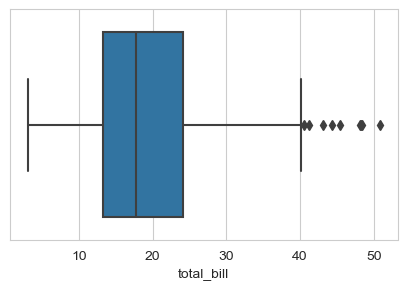

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=tips['total_bill'])

In [37]:
print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

Outliers below: -2.822
Outliers above: 40.297


In [58]:
iqr_outliers_mask = (tips['total_bill'] < (Q1 - 1.5 * IQR)) | (tips['total_bill'] > (Q3 + 1.5 * IQR))
iqr_outliers = tips[iqr_outliers_mask]
print(f'Percentage of Outliers: {len(iqr_outliers)/len(tips)*100:.3f}%')
iqr_outliers

Percentage of Outliers: 3.689%


,total_bill,tip,sex,smoker,day,time,size,z_score
59,48.27,6.73,Male,No,Sat,Dinner,4,3.199589
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.753642
142,41.19,5.00,Male,No,Thur,Lunch,5,2.404299
156,48.17,5.00,Male,No,Sun,Dinner,6,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.484905
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.871588
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.332408
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.619971
212,48.33,9.00,Male,No,Sat,Dinner,4,3.206329


#### When to use IQR vs zscore to detect outliers?

**When to use Z-Score**
- **Data is Normally Distributed**: Z-scores are most effective when the data follows a normal distribution or is      approximately symmetric. In this case, the Z-score gives a good measure of how far each point is from the mean.

- **Data is Continuous**: Z-score is suitable when the data is continuous and you want to detect points far from the mean.
- **Standardized Scale is Required**: Z-scores provide a standardized way to measure how extreme a data point is relative to the rest of the dataset.

**When to Use IQR:**
- **Data is Skewed or Non-Normal**: IQR works well when the data is not normally distributed, as it is resistant to skewed data and extreme values.

- **Non-Continuous or Ordinal Data**: IQR is better suited for ordinal data (e.g., rankings, scores) or data with non-normal distributions.
- **Robust to Outliers**: IQR is less affected by extreme outliers in the dataset, which makes it a robust measure.

#### Multivariate methods (for high-dimensional data), will not be covered: 
- Mahalanobis Distance
- DBSCAN
- Local Outlier Factor (LOF)
- Isolation Forest
- Elliptic Envelope (Robust Covariance Estimation).

<Axes: xlabel='total_bill', ylabel='tip'>

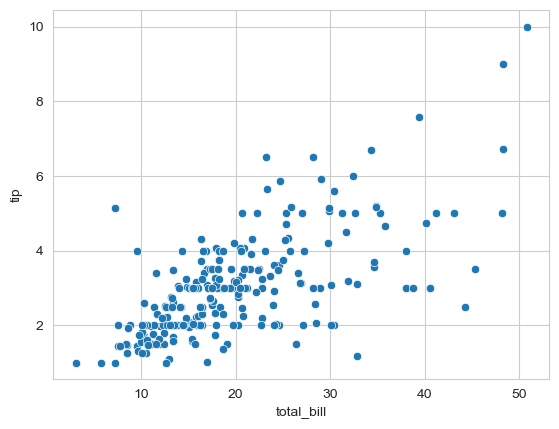

In [48]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

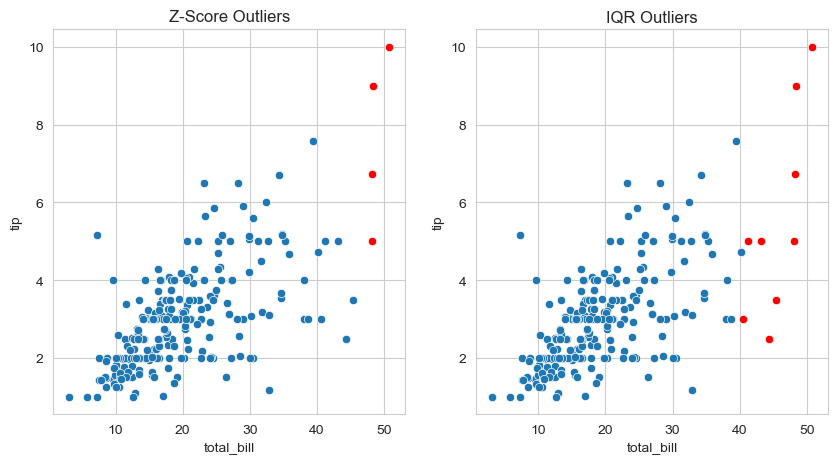

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#color the outliers in red

def plot_outliers(ax):
  sns.scatterplot(x='total_bill', y='tip', data=tips[~z_outliers_mask], ax=ax[0])  
  sns.scatterplot(x='total_bill', y='tip', data=z_outliers, color='red', ax=ax[0])


  sns.scatterplot(x='total_bill', y='tip', data=tips[~iqr_outliers_mask], ax=ax[1])
  sns.scatterplot(x='total_bill', y='tip', data=iqr_outliers, color='red', ax=ax[1])

  ax[0].set_title('Z-Score Outliers');
  ax[1].set_title('IQR Outliers');

plot_outliers(ax)

In [79]:
from scipy.spatial.distance import mahalanobis

def apply_mahalanobis(df):
  cov_matrix = np.cov(df.T)
  inv_cov_matrix = np.linalg.inv(cov_matrix)
  mean = np.mean(df, axis=0)
  df['mahalanobis'] = df.apply(lambda x: mahalanobis(x, mean, inv_cov_matrix), axis=1)

  threshold = 3.0  # You can adjust this
  mh_outliers_mask = df['mahalanobis'] > threshold
  mh_outliers = df[mh_outliers_mask]
  return mh_outliers_mask, mh_outliers

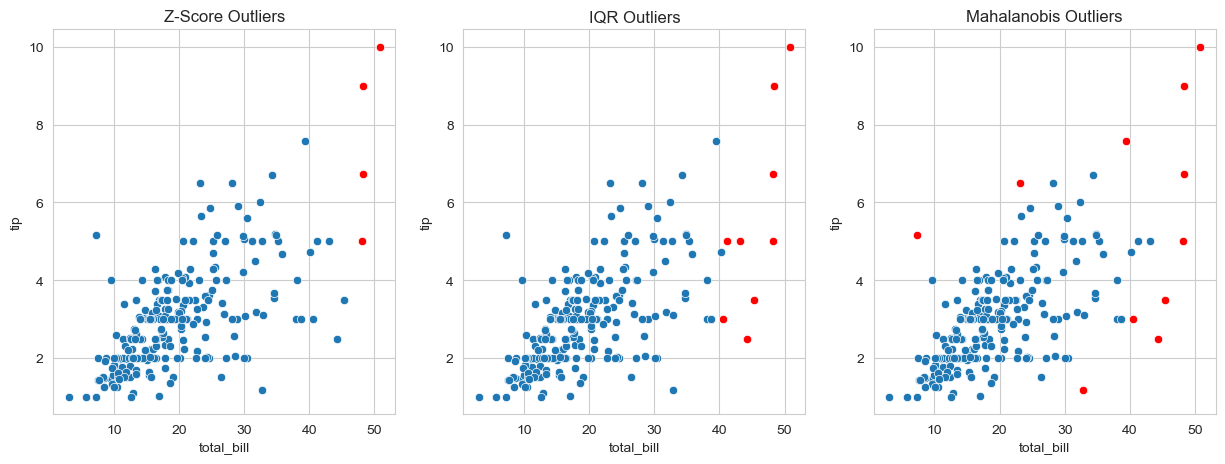

In [81]:
mahalanobis_df = tips[['total_bill', 'tip']].copy()
mh_outliers_mask, mh_outliers = apply_mahalanobis(mahalanobis_df)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_outliers(ax)

sns.scatterplot(x='total_bill', y='tip', data=mahalanobis_df[~mh_outliers_mask], ax=ax[2])
sns.scatterplot(x='total_bill', y='tip', data=mh_outliers, color='red', ax=ax[2])
ax[2].set_title('Mahalanobis Outliers');

### Handling Outliers Strategies:

> We will be using the outliers from IQR method for this lab.

#### Removal: Remove the outliers from the dataset. This is the simplest approach but can lead to loss of information.


In [86]:
iqr_cleaned_df = tips[~iqr_outliers_mask].copy()
print(f'Percentage of Outliers Removed: {len(iqr_cleaned_df)/len(tips)*100:.3f}%')
iqr_cleaned_df.head()

Percentage of Outliers Removed: 96.311%


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Transformation: Apply transformations like log, square root, or reciprocal to reduce the impact of outliers.
  - Log transformation is a common technique used to manage outliers, especially in datasets that are positively skewed.

**NOTE**: if the data contains values less than or equal to 0, you should add a constant to the data before applying the log transformation for example `np.log(x+1)` or use `np.log1p`

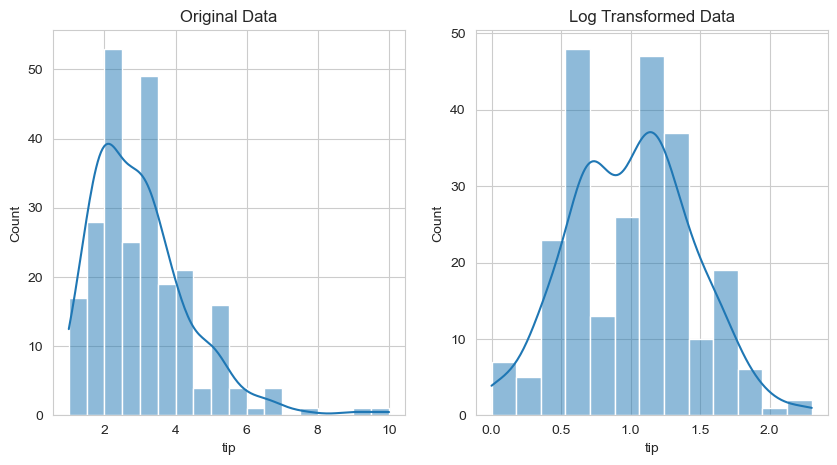

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips = np.log(tips['tip'])

sns.histplot(tips['tip'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(log_tips, ax=ax[1], kde=True);
ax[1].set_title('Log Transformed Data');

Check again using z-score & boxplot after transformation.

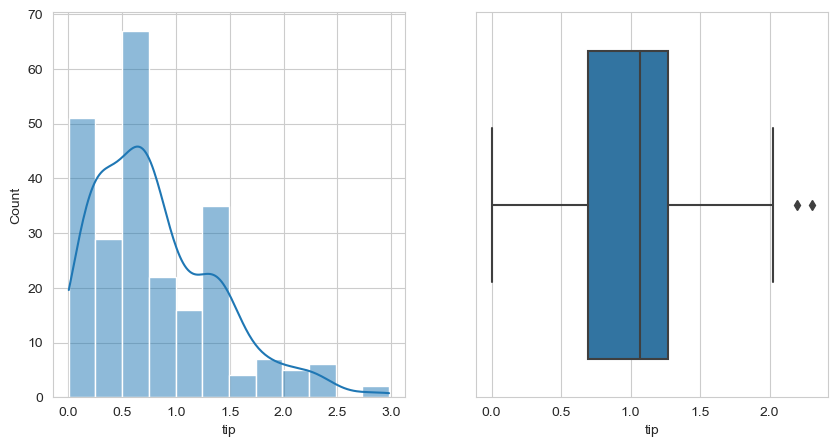

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips_z = np.abs((log_tips - log_tips.mean()) / log_tips.std())
sns.histplot(log_tips_z, kde=True, ax=ax[0]);

sns.boxplot(x=log_tips, ax=ax[1]);

#### Capping: Set a threshold value and cap the outliers to this value. This approach retains the data but reduces the impact of outliers.

In [121]:
Q1, Q3, IQR = tips['tip'].quantile(0.25), tips['tip'].quantile(0.75), tips['tip'].quantile(0.75) - tips['tip'].quantile(0.25)


max_iqr = Q3 + 1.5*IQR
min_iqr = Q1 - 1.5*IQR

q95 = tips['tip'].quantile(0.95)
q05 = tips['tip'].quantile(0.05)

print(f'min value in tips: {tips["tip"].min()}')
print(f'max value in tips: {tips["tip"].max()}')

max_iqr, q95, min_iqr, q05

min value in tips: 1.0
max value in tips: 10.0


(5.90625, 5.1955, -0.34375, 1.44)

In [130]:
up_cap = max_iqr
capped_df = tips.copy()
capped_df['capped_tip'] = np.where(capped_df['tip'] > up_cap, up_cap, capped_df['tip'])

capped_df[capped_df['tip'] > up_cap].head()

,total_bill,tip,sex,smoker,day,time,size,capped_tip
23,39.42,7.58,Male,No,Sat,Dinner,4,5.90625
47,32.40,6.00,Male,No,Sun,Dinner,4,5.90625
59,48.27,6.73,Male,No,Sat,Dinner,4,5.90625
141,34.30,6.70,Male,No,Thur,Lunch,6,5.90625
170,50.81,10.00,Male,Yes,Sat,Dinner,3,5.90625


In other cases we may need to cap the lower values as well

## 2. Data Transformation

In [134]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True) # Drop missing values to focus on transformations

In [137]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [143]:
from IPython.display import Image, display
display(Image(url="https://png.pngtree.com/png-clipart/20230814/original/pngtree-diagram-showing-parts-of-penguin-flipper-bill-tropical-vector-picture-image_10634856.png", width=400))


### Scaling and Normalization:

#### Min-Max scaling

$$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
penguins['flipper_length_scaled'] = scaler.fit_transform(penguins[['flipper_length_mm']]) 
penguins[['flipper_length_mm', 'flipper_length_scaled']]

,flipper_length_mm,flipper_length_scaled
0,181.0,0.152542
1,186.0,0.237288
2,195.0,0.389831
4,193.0,0.355932
5,190.0,0.305085
...,...,...
338,214.0,0.711864
340,215.0,0.728814
341,222.0,0.847458
342,212.0,0.677966


#### Standardization (Z-score) & Log transformation.
Mentioned earlier in outlier detection, these techniques are also used for data transformation.

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
penguins['flipper_length_standardized'] = scaler.fit_transform(penguins[['flipper_length_mm']])
penguins[['flipper_length_mm', 'flipper_length_standardized']]

,flipper_length_mm,flipper_length_standardized
0,181.0,-1.426752
1,186.0,-1.069474
2,195.0,-0.426373
4,193.0,-0.569284
5,190.0,-0.783651
...,...,...
338,214.0,0.931283
340,215.0,1.002739
341,222.0,1.502928
342,212.0,0.788372


In [147]:
penguins['flipper_length_log'] = np.log(penguins['flipper_length_mm'])
penguins[['flipper_length_mm','flipper_length_log']]

,flipper_length_mm,flipper_length_log
0,181.0,5.198497
1,186.0,5.225747
2,195.0,5.273000
4,193.0,5.262690
5,190.0,5.247024
...,...,...
338,214.0,5.365976
340,215.0,5.370638
341,222.0,5.402677
342,212.0,5.356586


### Categorical Data Transformation

In [149]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,flipper_length_scaled,flipper_length_standardized,flipper_length_log
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.152542,-1.426752,5.198497
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.237288,-1.069474,5.225747
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.389831,-0.426373,5.273000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.355932,-0.569284,5.262690
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.305085,-0.783651,5.247024


In [158]:
penguins['species'].value_counts()

adelie       146
gentoo       119
chinstrap     68
Name: species, dtype: int64

##### One-hot encoding

##### Option 1: Using pandas `get_dummies` function

In [157]:
penguins['species'] = penguins['species'].str.lower()
df_encoded = pd.get_dummies(penguins['species'], prefix='species') 

df_encoded.sample(5)

,species_adelie,species_chinstrap,species_gentoo
112,1,0,0
151,1,0,0
241,0,0,1
261,0,0,1
86,1,0,0


In [173]:
# add the encoded columns to the original dataframe
penguins_one = pd.merge(penguins, df_encoded, left_index=True, right_index=True)

penguins_one[['species'] + list(df_encoded.columns)].sample(5)

,species,species_adelie,species_chinstrap,species_gentoo
207,chinstrap,0,1,0
56,adelie,1,0,0
248,gentoo,0,0,1
282,gentoo,0,0,1
223,gentoo,0,0,1


##### Option 2: Using Sklearn's `OneHotEncoder`

In [187]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(penguins[['species']])

encoded[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### Label encoding

In [176]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

##### Option 1: Do it manually using `pandas` or `numpy` functions.

In [178]:
#perform label encoding using pandas and numpy 
penguins['island'] = penguins['island'].astype('category')
penguins['island_label'] = penguins['island'].cat.codes

penguins[['island', 'island_label']].sample(5)

,island,island_label
216,Dream,1
343,Biscoe,0
172,Dream,1
144,Dream,1
210,Dream,1


##### Option 2: Use `sklearn`'s `LabelEncoder` for encoding categorical data.

In [184]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
penguins['island_label2'] = encoder.fit_transform(penguins['island'])
penguins[['island', 'island_label2']].sample(5)

,island,island_label2
76,Torgersen,2
124,Torgersen,2
123,Torgersen,2
169,Dream,1
175,Dream,1


### Feature Selection

#### 1. Variance Threshold (using sklearn Iris dataset)
This method removes features with very low variance. In this example, the Iris dataset is used, and features with a variance below the threshold are removed.

In [189]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

# Load dataset
_iris = load_iris()
iris_df = pd.DataFrame(_iris.data, columns=_iris.feature_names)

In [190]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [195]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.2)
selected = selector.fit_transform(iris_df)
df_selected = pd.DataFrame(selected, columns=iris_df.columns[selector.get_support()])
print("Selected Features Shape:", df_selected.shape)
df_selected

Selected Features Shape: (150, 3)


,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


#### 2. Correlation-Based Selection


<Axes: >

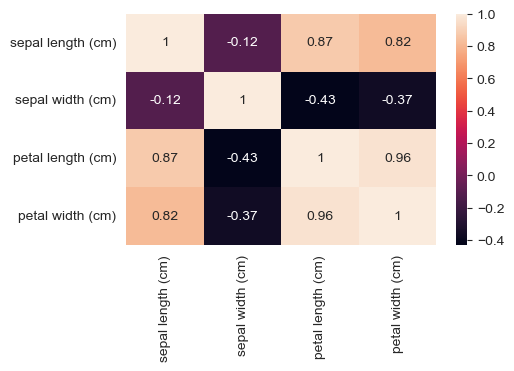

In [202]:
plt.figure(figsize=(5, 3))
sns.heatmap(iris_df.corr(), annot=True)

Here we observe that petal length and petal width have high correlation > 0.95, so we can remove one of both

In [203]:
iris_selected = iris_df.drop(columns=['petal length (cm)'])

iris_selected.head()

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


#### More: Recursive Feature Elimination (RFE) & SelectKBest 

### Feature Engineering

#### 1. Binning (Discretization)
Binning involves converting continuous variables into discrete bins or intervals. It is useful when dealing with skewed data or when you want to convert continuous features into categorical ones.

<Axes: xlabel='total_bill', ylabel='Count'>

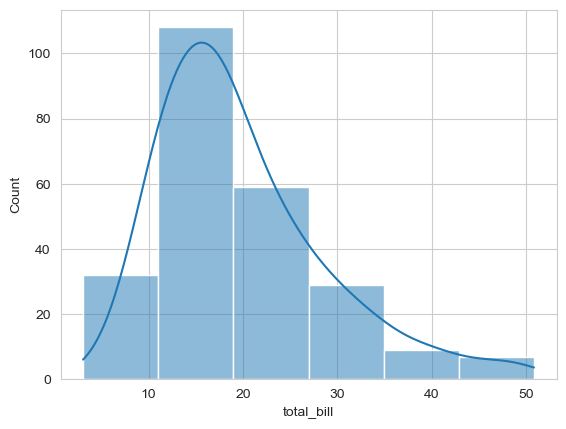

In [205]:
tips = sns.load_dataset('tips')

sns.histplot(tips['total_bill'], kde=True, bins=6)

In [207]:
# Create bins and labels
bins = [0, 10, 20, 30, 40, 50]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extreme']

# Apply binning
tips['total_bill_bin'] = pd.cut(tips['total_bill'], bins=bins, labels=labels)

In [210]:
tips[['total_bill', 'total_bill_bin']].sample(10)

,total_bill,total_bill_bin
36,16.31,Medium
191,19.81,Medium
196,10.34,Medium
216,28.15,High
3,23.68,High
97,12.03,Medium
6,8.77,Low
119,24.08,High
230,24.01,High
133,12.26,Medium


    Use Case: Binning helps convert continuous variables into more interpretable categorical variables.

### 2. One-Hot Encoding

This was covered earlier in the categorical data transformation section.

    Use Case: Use One-Hot Encoding when dealing with categorical features that have no ordinal relationship.

### 3. Log Transformation

This was covered earlier in the outlier handling section.

    Use Case: Use log transformation when the data is positively skewed or when outliers are disproportionately affecting the model.



### 4. Date/Time Feature Engineering

When working with temporal data, it's common to extract components such as the year, month, day, hour, etc., to make the data more usable for machine learning models.

>Example: Extracting date features from the California Housing dataset.




In [229]:
from sklearn.datasets import fetch_california_housing

df = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', end='12/31/2024', freq='10D'),
})

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df[['date', 'year', 'month']].sample(10)


,date,year,month
544,2014-11-23,2014,11
518,2014-03-08,2014,3
369,2010-02-07,2010,2
849,2023-03-31,2023,3
363,2009-12-09,2009,12
151,2004-02-19,2004,2
36,2000-12-26,2000,12
551,2015-02-01,2015,2
588,2016-02-06,2016,2
135,2003-09-12,2003,9


Other Feature Engineering Techniques can be used depending on the use case